<a href="https://colab.research.google.com/github/MAlHafiz/Pembelajaran-Mesin_Muhammad-Al-Hafiz_2211533010/blob/main/HierarchicalCluster_Muhammad%20Al%20Hafiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Memuat data
df = pd.read_csv('Country-data.csv')

# Melihat beberapa baris dari dataset
print(df.head())

# Memilih fitur yang relevan untuk clustering
features = df.select_dtypes(include=[np.number]).columns.tolist()

# Menghapus baris dengan nilai yang hilang
df = df.dropna(subset=features)

# Menormalisasi fitur (menggunakan StandardScaler atau MinMaxScaler)
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

print(X[:5])


               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  
[[ 1.29153238 -1.13827979  0.27908825 -0.08245496 -0.8082454   0.15733622
  -1.61909203  1.90288227 -0.67917961]
 [-0.5389489  -0.47965843 -0.09701618  0.07083669 -0.3753689  -0.31234747
   0.64786643 -0.85997281 -0.48562324]
 [-0.27283273 -0.09912164 -0.96607302 -0.64176233 -0.22084447  0.789274

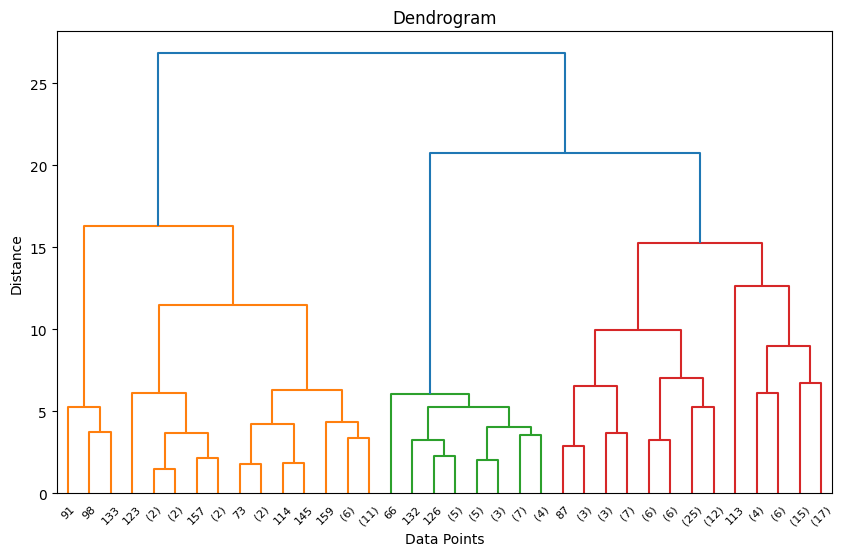

In [2]:
# Membuat Dendrogram (membantu menentukan jumlah cluster optimal)

# Membuat linkage matrix
Z = linkage(X, method='ward')

# Membuat dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [4]:
# Hierarchical Clustering
# Misalkan kita memilih 3 cluster berdasarkan dendrogram
optimal_clusters = 3

# Menambahkan label cluster ke dalam dataframe asli
df['Cluster'] = labels

print(df.head())


               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  Cluster  
0       9.44        56.2       5.82    553        2  
1       4.49        76.3       1.65   4090        1  
2      16.10        76.5       2.89   4460        1  
3      22.40        60.1       6.16   3530        1  
4       1.44        76.8       2.13  12200        1  


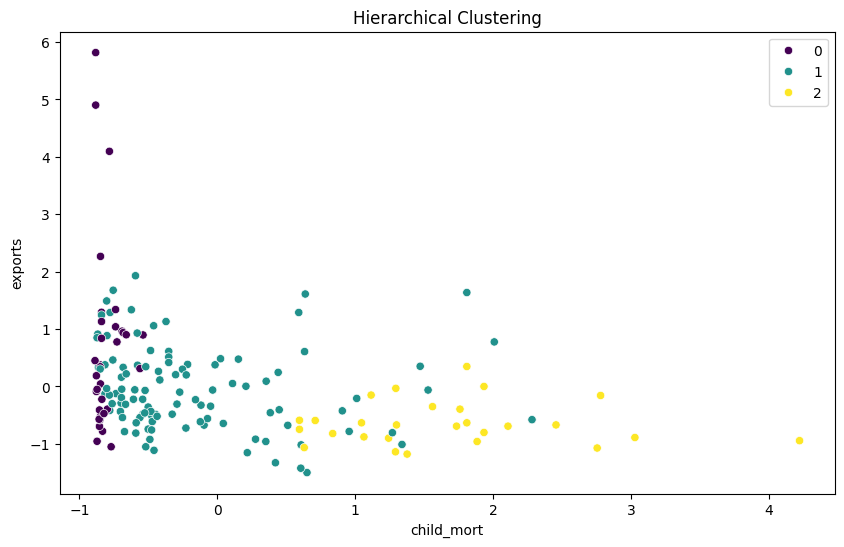

In [5]:
# Visualisasi hasil clustering jika ada dua fitur utama
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Hierarchical Clustering')
plt.show()
